In [1]:
from init import *

autotime loaded.


In [2]:
class SOM():
    def __init__(self, xlen, ylen, dimensions, number_of_iterations, stepsize):
        self.weights = np.random.randint(256, size=(xlen, ylen, dimensions)).astype('float64')
        self.total_iterations = number_of_iterations
        self.map_radius = max(self.weights.shape) / 2
        self.sigma = self.total_iterations / np.log(self.map_radius)
        self.stepsize = stepsize  
        
    def calculate_distance(self, vector):
        distance = np.sum((self.weights - vector) ** 2, 2)
        return distance

    def find_bmu(self, vector):
        distance = self.calculate_distance(vector)
        bmu = distance.argmin()
        bmu = np.unravel_index(bmu, distance.shape)
        return bmu
    
    def calculate_bmu_distance(self, vector):
        x, y, _ = self.weights.shape
        xi = np.arange(x).reshape(x, 1).repeat(y, 1)
        yi = np.arange(y).reshape(1, y).repeat(x, 0)
        weights = np.dstack((xi, yi))
        bmu = self.find_bmu(vector)
        distance =  np.sum((weights - np.array(bmu)) ** 2, 2)
        return distance 
    
    def calculateNeighbourhoodRadius(self, iteration):
        NeighbourhoodRadius = self.map_radius * np.exp(-iteration / self.sigma)
        return NeighbourhoodRadius

    def train_rowwise(self, vector, iteration, distance_cutoff, distance):
        sigma_2 = self.calculateNeighbourhoodRadius(iteration) ** 2
        bum_distance = self.calculate_bmu_distance(vector).astype('float64')
        influence = np.exp(-bum_distance / (2 * sigma_2))
        if distance_cutoff:
            if distance is None:
                temp = sigma_2 - bum_distance
            else:
                temp = distance ** 2 - bum_distance
            sign = ((np.sign(temp) + 1) / 2)
            influence *= sign
        new_weight = np.expand_dims(influence, 2) * (vector - self.weights)
        return new_weight
    
    def fit(self, data, distance_cutoff=False, distance=None):
        iterations = np.arange(self.total_iterations)
        for iteration in iterations:
            for row in data:
                self.weights += self.train_rowwise(row, iteration, distance_cutoff, distance)
        return self

time: 9.93 ms


In [3]:
data = np.random.randint(256, size=(100, 3))  
som = SOM(200, 200, 3, 100, 0.1).fit(data=data)

time: 46.9 s


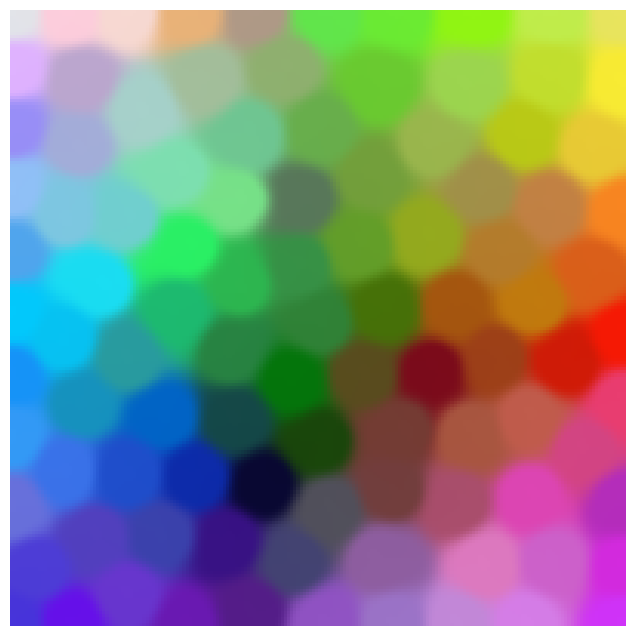

time: 151 ms


In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(som.weights[:, :, :] / 255)
ax.axis('off')
plt.show()